In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
#LOGISTIC REGRESSION

In [3]:
df=pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
#replace min value Zero
for i in ["Glucose","BMI","Insulin","BloodPressure"]:
    df[i].replace({0:df[i].median()},inplace = True)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df.shape

(768, 9)

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#to check outliers
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8152a72850>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8152a72e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8152a72490>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8152a82590>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8152a828d0>],
 'means': []}

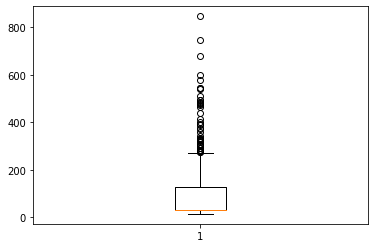

In [10]:
plt.boxplot(df["Insulin"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f815297b590>,
 'caps': [<matplotlib.lines.Line2D at 0x7f815297bd10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f815297b4d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8152987410>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8152987750>],
 'means': []}

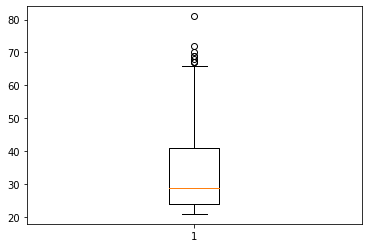

In [11]:
plt.boxplot(df["Age"])

In [12]:
x=np.quantile(df["Insulin"],[0,.10,.25,.50,.75,.80,.90,.99])

In [13]:
iqr=x[4]-x[2]
iqr
uw=x[4]+1.5*iqr
uw #upper whisker for check to start outlier
lw=x[2]-1.5*iqr
lw

-114.625

In [14]:
def outlier_treatment():
    l=["BMI","Glucose","SkinThickness","Age","BloodPressure","Insulin","Pregnancies","DiabetesPedigreeFunction"]
    for i in l:
        np.quantile(df[i],[.25,.75])
        iqr=x[1]-x[0]
        uw=x[1]+1.5*iqr
        uw
        lw=x[0]-1.5*iqr
        lw
        df[i]=np.where(df[i]>uw,uw,(np.where(df[i]<lw,lw,df[i])))

In [15]:
outlier_treatment()

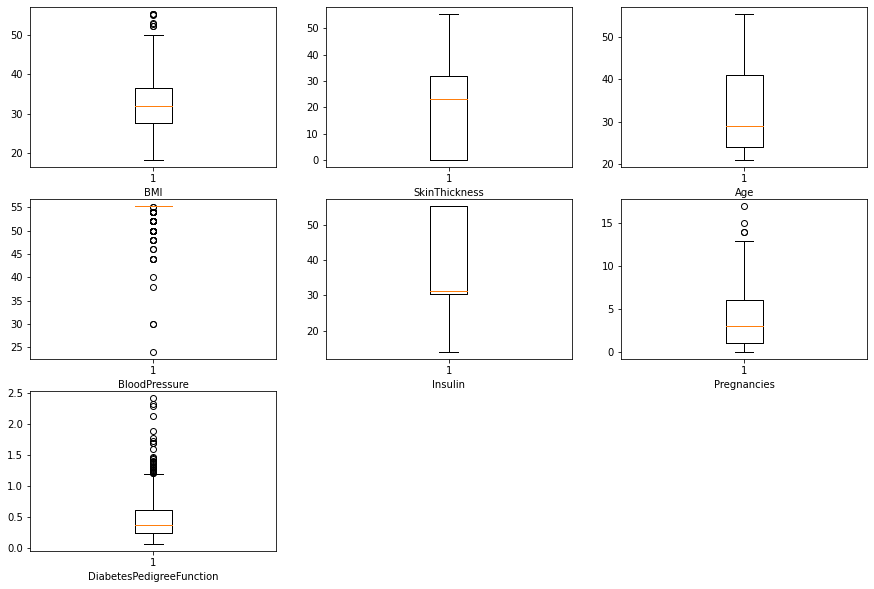

In [16]:
pno=1
plt.figure(figsize=(15,10))
for i in ["BMI","SkinThickness","Age","BloodPressure","Insulin","Pregnancies","DiabetesPedigreeFunction"]:
    if pno<9:
        plt.subplot(3,3,pno)
        plt.boxplot(df[i])
        plt.xlabel(i)
        pno+=1

In [17]:
x=df.drop(columns=["Outcome"])
y=df["Outcome"]

In [18]:
df.corr()["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
BMI                         0.312670
Age                         0.269949
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
SkinThickness               0.070288
BloodPressure               0.035234
Glucose                     0.026435
Insulin                    -0.006650
Name: Outcome, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.02,random_state=123)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred=logreg.predict(x_test)

In [24]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,roc_curve,roc_auc_score,confusion_matrix

In [25]:
confusion_matrix(y_test,y_pred)

array([[9, 0],
       [5, 2]])

In [26]:
accuracy_score(y_test,y_pred)

0.6875

In [27]:
f1_score(y_test,y_pred)

0.4444444444444445

In [28]:
cls1=classification_report(y_test,y_pred)
print(cls1)

              precision    recall  f1-score   support

           0       0.64      1.00      0.78         9
           1       1.00      0.29      0.44         7

    accuracy                           0.69        16
   macro avg       0.82      0.64      0.61        16
weighted avg       0.80      0.69      0.63        16



In [29]:
fpr,tpr,thershold=roc_curve(y_test,y_pred)
print(fpr)
print(tpr)
print(thershold)

[0. 0. 1.]
[0.         0.28571429 1.        ]
[2 1 0]


In [30]:
roc_auc_score(y_test,y_pred)

0.6428571428571428

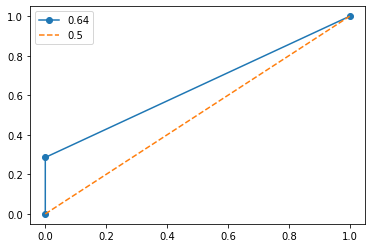

In [31]:
plt.plot(fpr,tpr,marker="o");
plt.plot([0,.2,.4,.6,.8,1],[0,.2,.4,.6,.8,1],"--")
plt.legend([.64,.5])